In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.patches import Patch

# Культура работы с данными: лекция 6

## Основы машинного обучения

### Постановка задачи на обучение

Рассмотрим $$
    T, E, P
$$

1. Задача
2. Опыт
3. Метрика производительности

### Виды машинного обучения

#### Обучение с учителем / Supervised learning

###### Задача: предсказать метку

###### Опыт: содержит правильные ответы

###### Метрика производительности: оценивает правильность ответа

#### Обучение без учителя / Unsupervised learning

###### Задача: найти структуру

###### Опыт: правильных ответов не содержит

###### Метрика производительности: оценивает выполнение предположений о структуре

#### Самообучение / Self-supervised learning

###### Задача: найти структуру через сжатие-восстановление

###### Опыт: выходные данные - это входные данные

###### Метрика производительности: оценивает точность восстановления

##### Обучение с частичным применением учителя / Semi-supervised learning

###### Задача: предсказать метку

###### Опыт: содержит правильные ответы, но не для всех примеров

###### Метрика производительности: оценивает правильность ответа

#### Обучение с подкреплением / Reinforcement learning

###### Задача: сформировать стратегию поведения, максимизирующую награду

###### Опыт: среда, с которой взаимодействует агент

###### Метрика производительности: награда за действия или последовательности действий

### Пример: линейная регрессия

Входные данные.

Features:
$$
    X = \{x_1, x_2 .. x_n\}, X \in R^n
$$

Labels:
$$
    Y \in R
$$


Prediction:
    $$
        \hat{Y} = \sum_{i=1}^n w_ix_i + b
    $$

Loss function:
$$
    J = \frac{1}{training\ set\ size}\sum_{training\ set}(\hat{Y}-Y)^2
$$

Objective: $$
    argmin_{W} J(W)
$$

### Градиентный спуск

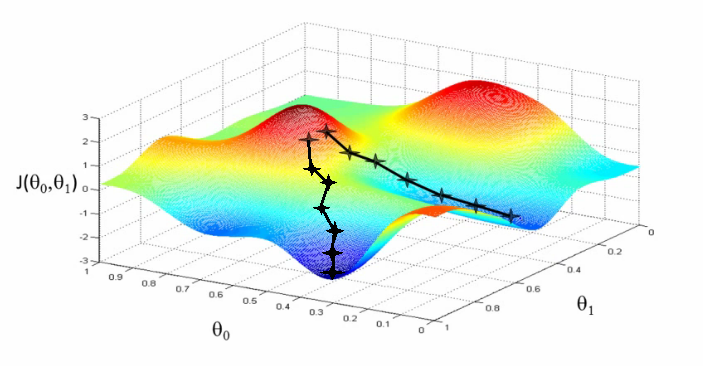

In [3]:
Image("GradientDescent.png")

Step:

$$
    W^{t+1} = W^{t} - \lambda \frac{dJ^{t}}{dW}
$$

Derivative of loss:
    $$
        \frac{dJ}{dW} = \frac{2}{training\ set\ size}\sum_{training\ set}\sum_{j=1}^n(\hat{y_j}-y_j)x_j
    $$

### Стандартный подход к построению вычислительного эксперимента

##### Машинное обучение - экспериментальная наука!

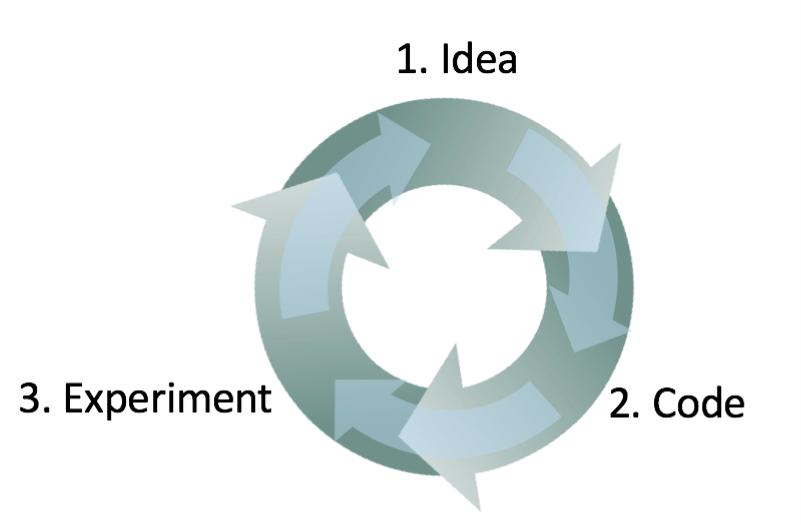

In [4]:
Image("IdeaExperimentCode.png")

1. Хорошая производительность на тренировочном наборе
2. Хорошая производительность на тестовом наборе
3. Хорошая производительность на валидации
4. Хорошая производительность на реальных данных

#### Разделение на тренировочный, тестовый и валидационный наборы

In [65]:
def plot_ds_bars():
    plt.bar([0, 1, 2, 4], [60, 98, 99, 0], color=(0,0,1,0.6))
    plt.bar([0, 1, 2, 4], [20, 1, 0.5, 0], bottom=[60, 98, 99, 0], color=(0,1,0,0.6))
    plt.bar([0, 1, 2, 4], [20, 1, 0.5, 0], bottom=[80, 99, 99.5, 0], color=(1,0,0,0.6))
    plt.yticks([0, 60, 80, 100])
    plt.xticks([0,1,2], ["Средний", "Большой", "Огромный"])
    plt.legend(
        loc="best", handles=[
            Patch(color="blue", label="Тренировка"),
            Patch(color="green", label="Тест"),
            Patch(color="red", label="Валидация")
        ]
    )
    plt.text(2.42, 50, "Средний: 60%/20%/20%")
    plt.text(2.42, 40, "Большой: 98%/1%/1%")
    plt.text(2.42, 30, "Огромный: 99%/0.5%/0.5%")
    plt.xlabel("Размер датасета")
    plt.ylabel("Доля датасета")
    plt.title("Как разбивать датасет?")

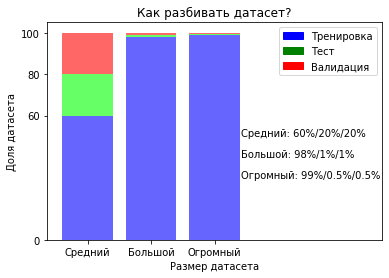

In [66]:
plot_ds_bars()

###### Предпочтительно иметь тест и валидацию, приходящие из одного распределения

#### Ошибки в машинном обучении

$$
    Error = Bias + Variance + Noize
$$

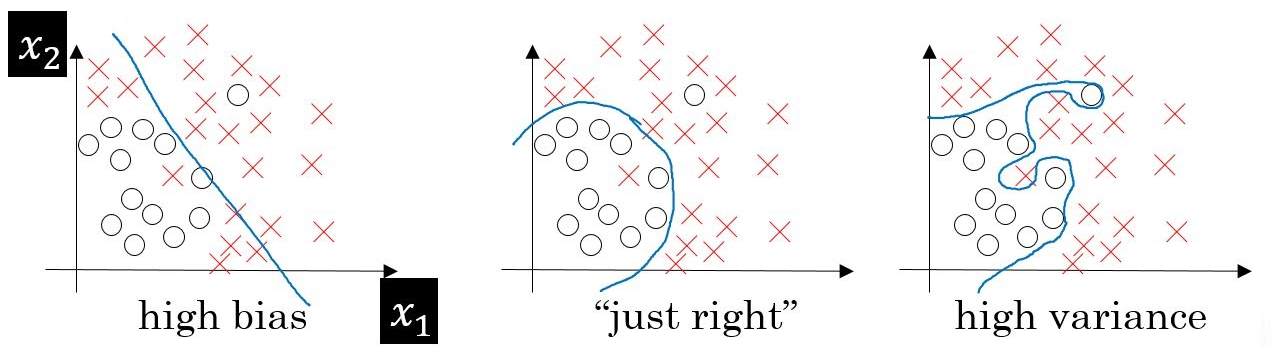

In [67]:
Image("BiasVariance.png")

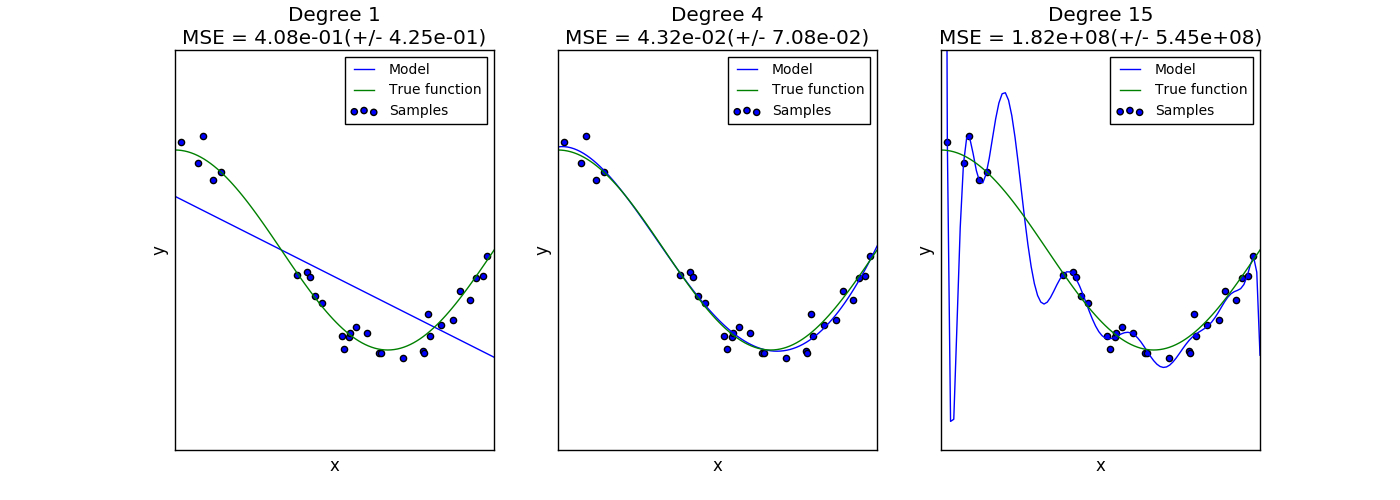

In [2]:
Image("OverfittingAndUnderfitting.png")

##### Высокое смещение?

Сначала нужно подобрать модель, которая хорошо работает на тренировочном наборе

1. Модель большего размера
2. Обучать дольше

##### Высокая вариация?

Сначала нужно подобрать модель, которая хорошо работает на тренировочном наборе

1. Больше данных
2. Другая архитектура
3. Регуляризация

### Обучение с учителем

#### Классификация

In [105]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

iris = sns.load_dataset('iris')
X_train, X_test, y_train, y_test = train_test_split(
    iris.values[:,0:4], [["setosa", "virginica", "versicolor"].index(a) for a in iris.values[:,4]],
    test_size=0.2
)

In [107]:
classifier = LogisticRegression(solver="lbfgs", multi_class="auto")
classifier.fit(X_train, y_train)
y_hat = classifier.predict(X_test)

In [111]:
pd.crosstab(y_hat, np.array(y_test))

col_0,0,1,2
row_0,,,
0,13,0,0
1,0,11,1
2,0,0,5


### Обучение без учителя

#### Уменьшение размерности

In [113]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
iris_reduced = pca.transform(iris.values[:,0:4])

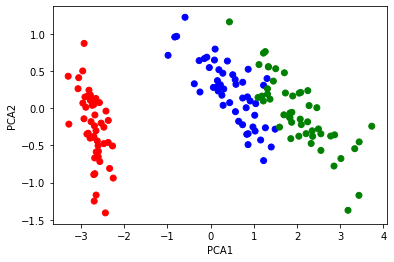

In [114]:
plt.scatter(
    iris_reduced.T[0], iris_reduced.T[1], 
    c=[{"setosa": "red", "versicolor": "blue", "virginica": "green"}[a] for a in iris.values[:,4]]
)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

#### Кластеризация

In [116]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X_train)
iris_clusters = km.predict(iris.values[:,0:4])

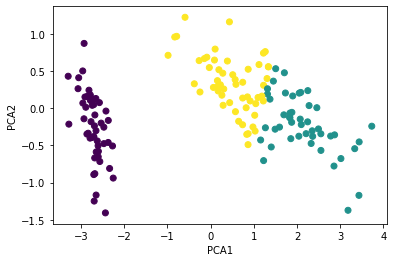

In [117]:
plt.scatter(
    iris_reduced.T[0], iris_reduced.T[1], 
    c=iris_clusters
)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

### Самообучение

#### Генерация

1. https://experiments.withgoogle.com/ai/melody-mixer/view/
2. https://experiments.withgoogle.com/ai/beat-blender/view/
3. https://teampieshop.github.io/latent-loops/